Importing libraries

In [1]:
import alphien
import datetime as dt
import pandas as pd

Hello Bhargavbhatt, welcome to Alphien!

Importing your Alphien sub-packages...

import alphien.data
import alphien.portfolio
import alphien.tutorial

Importing your Qlib functions...                                   from team:

No functions in Qlib teams: UBSSPEQUITY, UniliFinance, bhargavbhatt

Alphien environment imported. Let's do some research now!


In [ ]:
pd.set_option('display.max_rows', 10)

Functions

In [ ]:
def print_array(array):
    print('array size : ',array.size)
    for i in array:
        print(i)

In [ ]:
companies_data = alphien.data.getTickersSP500()

In [ ]:
companies_data.to_csv('companies_list.csv')

In [ ]:
companies_data.set_index(["industryCode","industry"]).count(level="industry").sort_values(by=['ticker'])

In [ ]:
industry_type = companies_data.industry.unique()
industry_type.size

In [ ]:
print_array(industry_type)

In [ ]:
tkr = ['AMZN.US Equity', 'NFLX.US Equity']
company_price = alphien.data.getHistoryData(tkr, zoom='2007::2016')

ticker_all = companies_data.ticker.unique()

In [ ]:
#pd.set_option('display.max_rows', 10)
company_price

In [ ]:
marketList = alphien.data.getTickersSP500Data()
marketList

In [ ]:
dataList = alphien.data.getTickersSP500Data()
SPWIndex = alphien.data.getHistoryData(dataList.ticker.iloc[16],zoom="2007::2016")

In [ ]:
SPWIndex

In [ ]:
combine_dataframe = pd.merge(SPWIndex,company_price,on='date',how='outer')
combine_dataframe = combine_dataframe.apply(lambda x: x/x.loc[x.first_valid_index()])

In [ ]:
combine_dataframe.plot()

In [ ]:
combine_dataframe['Diff_AMZN']=combine_dataframe['AMZN.US Equity'] - combine_dataframe['SPW Index']

In [ ]:
combine_dataframe

In [ ]:
combine_dataframe.loc['2007-01-01':'2008-01-01']

In [ ]:
combine_dataframe.loc['2007-01-01':'2008-01-01'].mean(axis = 0) 

In [ ]:
test = combine_dataframe.loc['2007-01-01':'2008-01-01'].max(axis = 0) 

In [ ]:
print(test)

In [ ]:
combine_dataframe.loc['2007-01-01':'2008-01-01'].plot()

In [ ]:
df = pd.DataFrame(columns = ['Ticker', 'StarYear','EndYear','Mean','Max_Difference','SPW_Mean'])

In [ ]:
df

In [ ]:
def get_yearly_data(ticker,start_year,end_year):
    company_price = alphien.data.getHistoryData(ticker, zoom='2007::2016')
    combine_dataframe = pd.merge(SPWIndex,company_price,on='date',how='outer')
    combine_dataframe = combine_dataframe.apply(lambda x: x/x.loc[x.first_valid_index()])
    start_date=str(start_year)+'-01-01'
    end_date=str(end_year)+'-12-31'
    filter_data = combine_dataframe.loc[start_date:end_date]
    filter_data.plot()
    s1 = 'Diff_'+ str(ticker)
    filter_data[s1]=combine_dataframe[ticker] - combine_dataframe['SPW Index']
    print(filter_data.mean(axis=0))
    print(filter_data.max(axis=0))
    print(filter_data.min(axis=0))
    mean_value=filter_data.mean(axis=0)[ticker]
    max_diff=filter_data.max(axis=0)[s1]
    SPW_Mean=filter_data.mean(axis=0)['SPW Index']
    print(mean_value,max_diff,SPW_Mean)
    print(filter_data)
    #Adding values to dataframe
    #df1 = pd.DataFrame([[ticker,start_year,end_year,mean_value,max_diff,SPW_Mean]],columns= ['Ticker', 'StarYear','EndYear','Mean','Max_Difference','SPW_Mean'])


In [ ]:
get_yearly_data('RIG.US Equity',2007,2016)

In [ ]:
for t in ticker_all:
    df2 = get_yearly_data(t,2007,2016)
    df = df.append(df2)

In [ ]:
df['diff']=df['Mean']-df['SPW_Mean']

In [ ]:
df3 = df.sort_values(by=['diff'], ascending=False)

In [ ]:
df3

In [ ]:
df3.to_csv('sortedMean.csv')

In [ ]:
!pip install openpyxl

In [ ]:
alphien.data.getHistoryData('RIG.US Equity',zoom="2007::2016")

In [ ]:
df5 = alphien.data.getHistoryData('RIG.US Equity', field = 'ohlc').head(30)

In [ ]:
df5['diff_hl']=df5['high_price']-df5['low_price']

In [ ]:
df5

In [ ]:
df5.mean(axis=0)

In [ ]:
#################################

In [5]:
t='AMZN.US Equity'
number_of_days=200
number_of_days_short=50


string_high = 'high_price'
string_low = 'low_price'
string_open = 'open_price'
string_close = 'close_price'
string_ma = t+ '.moving_avg'
string_dailydiff = t+'.daily_diff'
string_dailyvol = t+'.daily_vol'
string_ma_short = t+ '.moving_avg_short'



all_data = alphien.data.getHistoryData(t, field = 'ohlc') #returns the Open, High, Low, Close for all stock
all_data
all_data[string_ma] = all_data[string_close].rolling(window=number_of_days).mean()
all_data[string_ma_short] = all_data[string_close].rolling(window=number_of_days_short).mean()
all_data[string_dailydiff] = all_data[string_high] - all_data[string_low]
all_data[string_dailyvol] = all_data[string_dailydiff].rolling(window=number_of_days).mean()    

In [ ]:
all_data

In [ ]:
all_data['bhargav']=0.0

In [ ]:
print(SBO.iloc[SBO.index.get_loc('2016-12-30')]['High'])

In [ ]:
for i in all_data.index:
    index_number = all_data.index.get_loc(i)
    if index_number < (number_of_days-1):
        #print(index_number,'way1')
        #print('NAN : ',all_data.iloc[index_number]['NFLX.US Equity.moving_avg'],i)
        #print(all_data.iloc[index_number])
        
        v1 = 0
        
    elif index_number > (number_of_days-2) and index_number < ((2*number_of_days)-1):
        #print(index_number,'way2')
        #print("method 1 : ",all_data.iloc[index_number]['NFLX.US Equity.moving_avg'],i)
        v1 = ((all_data.iloc[index_number][string_ma]-all_data.iloc[index_number-number_of_days][string_close])/all_data.iloc[index_number-number_of_days][string_close])
        
        #print(all_data['test'][i])
    else :
        #print(index_number,'way3')
        #print("method 2 : ",all_data.iloc[index_number]['NFLX.US Equity.moving_avg'],i,'---',all_data.iloc[index_number-200]['NFLX.US Equity.moving_avg'])
        v1 = ((all_data.iloc[index_number][string_ma]-all_data.iloc[index_number-number_of_days][string_ma])/all_data.iloc[index_number-number_of_days][string_ma])
        #print(all_data['test'][i])
    #print(v1)
    all_data['bhargav'][index_number] = v1


In [ ]:
all_data

In [ ]:
#############################################################

In [6]:
ticker_all = ['FB.US Equity', 'AMZN.US Equity', 'NFLX.US Equity', 'GOOG.US Equity']

In [7]:
all_data = alphien.data.getHistoryData(ticker_all, field = 'ohlc') #returns the Open, High, Low, Close for all stock

In [8]:
for t in ticker_all:
    print('Starting process for ticker : ', t)
    string_high = t+'.high_price'
    string_low = t+'.low_price'
    string_open = t+'.open_price'
    string_close = t+'.close_price'
    string_ma = t+'.moving_avg'
    string_ma_short = t+ '.moving_avg_short'
    string_dailydiff = t+'.daily_diff'
    string_dailyvol = t+'.daily_vol'
    string_dailyvol_short = t+'.daily_vol_short'
    string_slope_ma = t+'.slope_ma'
    string_slope_ma_short = t+'.slope_ma_short'
    string_trend_stability = t+'.trend_stability'
    string_trend_strength = t+'.trend_strength'
    string_trend_sum = t+'.trend_sum'
    
    all_data[string_ma] = all_data[string_close].rolling(window=number_of_days).mean()
    all_data[string_ma_short] = all_data[string_close].rolling(window=number_of_days_short).mean()
    all_data[string_dailydiff] = all_data[string_high] - all_data[string_low]
    all_data[string_dailyvol] = all_data[string_dailydiff].rolling(window=number_of_days).mean()
    all_data[string_dailyvol_short] = all_data[string_dailydiff].rolling(window=number_of_days_short).mean()
    all_data[string_slope_ma] = 0.0
    all_data[string_slope_ma_short] = 0.0
    
    
    #Applying for loop on each rows to calculate slope ma and short slope ma
    for i in all_data.index:
        index_number = all_data.index.get_loc(i)
        
        #Calculating slope for long days ie 200 days
        if index_number < (number_of_days-1):
            value=0
            
        elif index_number > (number_of_days-2) and index_number < ((2*number_of_days)-1):
            value = ((all_data.iloc[index_number][string_ma]-all_data.iloc[index_number-number_of_days][string_close])/all_data.iloc[index_number-number_of_days][string_close])
        
        else:    
            value = ((all_data.iloc[index_number][string_ma]-all_data.iloc[index_number-number_of_days][string_ma])/all_data.iloc[index_number-number_of_days][string_ma])
        
        try:
            all_data[string_slope_ma][index_number]=value
        except:
            all_data[string_slope_ma][index_number]=0.0
        
        #Calculating slope for short days ie 50
        if index_number < (number_of_days_short-1):
            value_short=0.0
            
        elif index_number > (number_of_days_short-2) and index_number < ((2*number_of_days_short)-1):
            value_short = ((all_data.iloc[index_number][string_ma_short]-all_data.iloc[index_number-number_of_days_short][string_close])/all_data.iloc[index_number-number_of_days_short][string_close])
        
        else:    
            value_short = ((all_data.iloc[index_number][string_ma_short]-all_data.iloc[index_number-number_of_days_short][string_ma_short])/all_data.iloc[index_number-number_of_days_short][string_ma_short])
            
        try:
            all_data[string_slope_ma_short][index_number]=value_short
        except:
            all_data[string_slope_ma_short][index_number]=0.0
        
    #Calculating trend stability
    all_data[string_trend_stability]=all_data[string_slope_ma]/all_data[string_dailyvol]
        
    #Calculating trend strength
    all_data[string_trend_strength] = (all_data[string_slope_ma]*4)+all_data[string_slope_ma_short]
    
    #Calculating sum of trend stability and trend strength
    all_data[string_trend_sum] = all_data[string_trend_stability] + all_data[string_trend_strength]    


Starting process for ticker :  FB.US Equity
Starting process for ticker :  AMZN.US Equity
Starting process for ticker :  NFLX.US Equity
Starting process for ticker :  GOOG.US Equity


In [9]:
all_data[['FB.US Equity.trend_sum','AMZN.US Equity.trend_sum','NFLX.US Equity.trend_sum','GOOG.US Equity.trend_sum']].to_csv('test_list.csv')

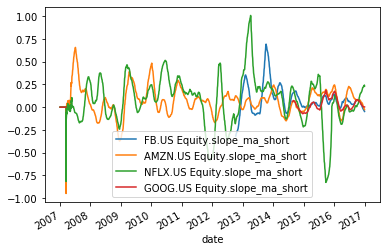

In [10]:
all_data[['FB.US Equity.slope_ma_short','AMZN.US Equity.slope_ma_short','NFLX.US Equity.slope_ma_short','GOOG.US Equity.slope_ma_short']].plot()

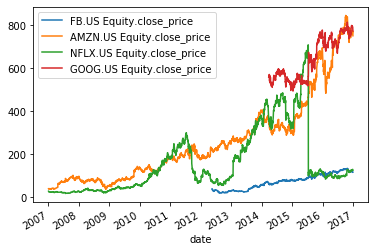

In [11]:
all_data[['FB.US Equity.close_price','AMZN.US Equity.close_price','NFLX.US Equity.close_price','GOOG.US Equity.close_price']].plot()

In [12]:
all_data['NFLX.US Equity.trend_sum'].dropna()

date
2007-10-17   -4.489803
2007-10-18   -1.121097
2007-10-19   -0.900510
2007-10-22   -0.794848
2007-10-23   -0.590037
                ...   
2016-12-23   -1.879895
2016-12-27   -1.842025
2016-12-28   -1.802417
2016-12-29   -1.772044
2016-12-30   -1.742524
Name: NFLX.US Equity.trend_sum, Length: 2319, dtype: float64

In [13]:
companies_data = alphien.data.getTickersSP500()
companies_data

,ticker,company,constituentStart,constituentEnd,industryCode,industry
tablerownames,,,,,,
2,A.US Equity,Agilent Technologies Inc.,2000-06-02,NaT,351010,Health Care Equipment & Supplies
3,AA.US Equity,Alcoa Inc,1970-01-01,2016-10-31,151040,Metals & Mining
6,AAL.US Equity,American Airlines Group Inc,2015-03-20,NaT,203020,Airlines
7,AAP.US Equity,Advance Auto Parts Inc,2015-07-08,NaT,255040,Specialty Retail
8,AAPL.US Equity,Apple Inc.,1982-11-18,NaT,452020,Computers & Peripherals
...,...,...,...,...,...,...
1672,YHOO.US Equity,Yahoo! Inc,1999-12-07,2017-06-17,451010,Internet Software & Services
1675,YUM.US Equity,Yum! Brands Inc.,1997-10-06,NaT,253010,"Hotels, Restaurants & Leisure"
1678,ZBH.US Equity,Zimmer Biomet Holdings Inc,2001-08-06,NaT,351010,Health Care Equipment & Supplies


In [14]:
companies_data.loc[companies_data.ticker == 'GOOG.US Equity']

,ticker,company,constituentStart,constituentEnd,industryCode,industry
tablerownames,,,,,,
679,GOOG.US Equity,Alphabet Inc. Class C,2014-04-03,NaT,502030,Interactive Media & Services


In [15]:
def check_company_sp500(ticker,date):
    companies_data = alphien.data.getTickersSP500()
    company_data = companies_data[companies_data.ticker == ticker]
    i=company_data.index[0]
    start_date = company_data['constituentStart'][i]
    end_date = company_data['constituentEnd'][i]
    print(start_date)
    print(type(start_date),type(date))
    if date > start_date and date < end_date:
        return True
    else:
        return False

In [16]:
def sp500_company_list(date):
    companies_data = alphien.data.getTickersSP500()
    company_list=[]
    for c in companies_data.index:
        start_date = companies_data['constituentStart'][c]
        
        if pd.isnull(companies_data['constituentEnd'][c]):
            end_date=date.today()
        else:    
            end_date = companies_data['constituentEnd'][c]
            
            
        if date > start_date and date < end_date:
            company_list.append(companies_data['ticker'][c])
    return company_list

In [ ]:
for i in all_data.index:
    index_number = all_data.index.get_loc(i)
    print(i,check_company_sp500('NFLX.US Equity',i))

In [ ]:
for i in all_data.index:
    index_number = all_data.index.get_loc(i)
    if index_number>10:
        break
    print(i)
    string_company_list='sp500_companylist'
    print(len(sp500_company_list(i)))
    
    

In [30]:
#Only keeping required fields
fields=[]
for t in ticker_all:
    #fields.append(t+'.close_price')
    fields.append(t+'.trend_sum')

fields

['FB.US Equity.trend_sum',
 'AMZN.US Equity.trend_sum',
 'NFLX.US Equity.trend_sum',
 'GOOG.US Equity.trend_sum']

In [31]:
refine_data = all_data[fields]

In [32]:
refine_data

,FB.US Equity.trend_sum,AMZN.US Equity.trend_sum,NFLX.US Equity.trend_sum,GOOG.US Equity.trend_sum
date,,,,
2007-01-03,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN
2007-01-08,NaN,NaN,NaN,NaN
2007-01-09,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-23,1.042270,1.312339,-1.879895,0.561629
2016-12-27,1.033427,1.309617,-1.842025,0.556969
2016-12-28,1.023932,1.307452,-1.802417,0.552004


In [58]:
to_test = refine_data.tail(40)
to_test

,FB.US Equity.trend_sum,AMZN.US Equity.trend_sum,NFLX.US Equity.trend_sum,GOOG.US Equity.trend_sum
date,,,,
2016-11-03,1.294596,1.370733,-2.698086,0.758912
2016-11-04,1.293069,1.364531,-2.684129,0.751407
2016-11-07,1.292438,1.359898,-2.667981,0.745943
2016-11-08,1.291164,1.354599,-2.652025,0.740093
2016-11-09,1.292028,1.350347,-2.636020,0.735114
2016-11-10,1.282988,1.339392,-2.619350,0.726343
2016-11-11,1.272723,1.332528,-2.604439,0.716465
2016-11-14,1.258281,1.325487,-2.587160,0.704804
2016-11-15,1.244034,1.320209,-2.571746,0.692206


In [61]:
#to_test['company_list']=''
px = to_test.copy()
px['cl']=''
for i in to_test.index:
    company_list=sp500_company_list(i)
    index_number = to_test.index.get_loc(i)
    #for t in company_list:
     #       print(t)
    #maxValueIndex = to_test.loc[[i]].idxmax(axis = 1)
    df=to_test.loc[[i]]
    #print(maxValueIndex)
    df = df.stack().groupby(level=0).rank(method ='first',ascending =False).reset_index(level=1).set_index(0,append=True).unstack()

    df = df.apply(lambda x: ','.join(x), axis = 1)
    
    try:
        px['cl'][index_number]=df[i].replace('.trend_sum', '')
    except:
        px['cl'][index_number]=''
        
    print(df[i].replace('.trend_sum', ''))
    #df['new'] = df['new'].replace('.trend_sum', '')
    #df['new'] = df['new'].str.replace('.trend_sum', '',regax=False) 

AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity,FB.US Equity,GOOG.US Equity,NFLX.US Equity
AMZN.US Equity

In [72]:
for i in px.index:
    j =  px['cl'][i].split(',')
    print(j)

['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN.US Equity', 'FB.US Equity', 'GOOG.US Equity', 'NFLX.US Equity']
['AMZN

In [ ]:
for t in t2:
    print(t.replace())

In [38]:
df2 = to_test.stack().groupby(level=0).rank(method ='first',ascending =False).reset_index(level=1).set_index(0,append=True).unstack()
#df2['combine'] = df2.apply(lambda x: ' '.join(x), axis = 1) 

DataError: No numeric types to aggregate

In [ ]:
df2 = df2.apply(lambda x: ','.join(set(x.astype(str))), axis=1)


In [ ]:
to_test

In [ ]:
for i in all_data.index:
    index_number = all_data.index.get_loc(i)
    if index_number>10:
        break
    print(i)
    company_list=sp500_company_list(i)
    for t in company_list:
    

In [ ]:
############################################################# CsV

In [ ]:
df1 = pd.read_csv('./all_data_google.csv')

In [ ]:
for i in df1.index:
    company_list=sp500_company_list(i)

In [ ]:
df1